# *Treebank-Ressourcen und -Formate im NLTK*

- Neben Plaintext-Korpora (z.B. gutenberg) und POS-annotierten (z.B. Brown) enthalten die NLTK-Ressourcen auch verschiedene Typen von syntaktisch annotierten Korpora (**Treebanks**)


In [5]:
import nltk

## Chunk Treebanks 

- partielle Syntax-Analyse von basalen Phrasen (Chunks), nicht-hierarchische Struktur
- repräsentiert als **Tripel-Liste** `(word, POS, IOB-Tag)`


In [29]:
from nltk.corpus import conll2000, conll2002
print(conll2000.sents()[99])

['Over', 'a', 'cup', 'of', 'coffee', ',', 'Mr.', 'Stone', 'told', 'his', 'story', '.']


In [30]:
print(conll2000.iob_sents()[99])

[('Over', 'IN', 'B-PP'), ('a', 'DT', 'B-NP'), ('cup', 'NN', 'I-NP'), ('of', 'IN', 'B-PP'), ('coffee', 'NN', 'B-NP'), (',', ',', 'O'), ('Mr.', 'NNP', 'B-NP'), ('Stone', 'NNP', 'I-NP'), ('told', 'VBD', 'B-VP'), ('his', 'PRP$', 'B-NP'), ('story', 'NN', 'I-NP'), ('.', '.', 'O')]


In [31]:
print(conll2000.chunked_sents()[99])

(S
  (PP Over/IN)
  (NP a/DT cup/NN)
  (PP of/IN)
  (NP coffee/NN)
  ,/,
  (NP Mr./NNP Stone/NNP)
  (VP told/VBD)
  (NP his/PRP$ story/NN)
  ./.)


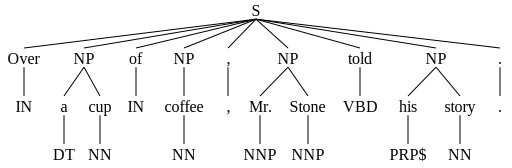

In [32]:
conll2000.chunked_sents(chunk_types=['NP'])[99]
#from nltk import Tree
#Tree.fromstring(str(conll2000.chunked_sents(chunk_types=['NP'])[99])).pretty_print()

##  Konstituenten-Treebanks 

- syntaktisch annotierte Korpora gemäß CFG-Regeln
- repräsentiert als **Liste von Parsebäumen** (tree)


### nltk.corpus.treebank

In [26]:
from nltk.corpus import treebank # Sample of Penn Treebank 
print(treebank.tagged_words('wsj_0001.mrg'))

[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ...]


### nltk.parsed_sents

In [27]:
# Parsed text as list of trees:
print(treebank.parsed_sents('wsj_0001.mrg')[0])

(S
  (NP-SBJ
    (NP (NNP Pierre) (NNP Vinken))
    (, ,)
    (ADJP (NP (CD 61) (NNS years)) (JJ old))
    (, ,))
  (VP
    (MD will)
    (VP
      (VB join)
      (NP (DT the) (NN board))
      (PP-CLR (IN as) (NP (DT a) (JJ nonexecutive) (NN director)))
      (NP-TMP (NNP Nov.) (CD 29))))
  (. .))


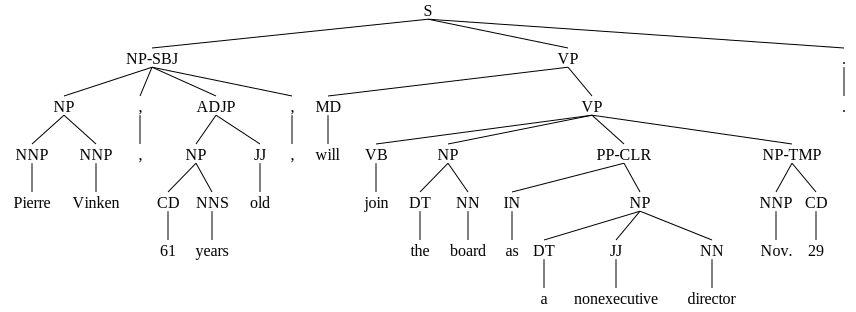

In [28]:
treebank.parsed_sents('wsj_0001.mrg')[0]
#treebank.parsed_sents('wsj_0001.mrg')[0].pretty_print(unicodelines=True)

## Dependency-Treebanks

- syntaktisch annotierte Korpora mit Dependenzrelationen
- repräsentiert als **Liste von Dependency-Trees** (= DependencyGraph) bzw. **Tokenliste mit Head-Dependency-Relationen** (CONLL-Format) über `to_conll`

### nltk.corpus.dependency_treebank

In [33]:
## http://www.nltk.org/howto/dependency.html
from nltk.corpus import dependency_treebank

### to_conll

In [34]:
t = dependency_treebank.parsed_sents()[1]
print(t.tree(), "\n")
print(t.to_conll(3), "\n")
t.tree().pretty_print(unicodelines=True)

(is
  (Vinken Mr.)
  (chairman (of (group (N.V. Elsevier) , the Dutch publishing)))
  .) 

Mr.	NNP	2
Vinken	NNP	3
is	VBZ	0
chairman	NN	3
of	IN	4
Elsevier	NNP	7
N.V.	NNP	12
,	,	12
the	DT	12
Dutch	NNP	12
publishing	VBG	12
group	NN	5
.	.	3
 

                is                             
 ┌────┬─────────┴─────┐                         
 │    │            chairman                    
 │    │               │                         
 │    │               of                       
 │    │               │                         
 │    │             group                      
 │    │     ┌───┬─────┼─────────┬─────────┐     
 │  Vinken  │   │     │         │        N.V.  
 │    │     │   │     │         │         │     
 .   Mr.    ,  the  Dutch   publishing Elsevier



## gelabelte Dependency-Treebanks

- zusätzlich mit gelabelter syntaktischer Funktion des Dependenten, z.B. `nsubj`, `obj`
- häufiges Format: Universal Dependencies 


- nicht in den NLTK-Ressourcen enthalten, kann aber eingelesen und mit NLTK-Methoden wie `to_conll` verarbeitet werden

In [35]:
## first sentence DE-UD-DEV Corpus: https://github.com/UniversalDependencies/UD_German-GSD/tree/master
treebank = """1	Manasse	Manasse	PROPN	NN	Case=Nom|Gender=Fem|Number=Sing	5	nsubj	_	NamedEntity=Yes
2	ist	sein	AUX	VAFIN	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	5	cop	_	_
3	ein	ein	DET	ART	Case=Nom|Definite=Ind|Gender=Masc|Number=Sing|PronType=Art	5	det	_	_
4	einzigartiger	einzigartig	ADJ	ADJA	Case=Nom|Gender=Masc|Number=Sing	5	amod	_	_
5	Parfümeur	Parfümeur	NOUN	NN	Case=Nom|Gender=Masc|Number=Sing	0	ROOT	_	SpaceAfter=No
6	.	.	PUNCT	$.	_	5	punct	_	_
"""

### nltk.DependencyGraph

In [36]:
from nltk import DependencyGraph
t = DependencyGraph(treebank)
#print(t.tree())
print(t.to_conll(3))
t.tree().pretty_print(unicodelines=True)
#display(t)

Manasse	NN	5
ist	VAFIN	5
ein	ART	5
einzigartiger	ADJA	5
Parfümeur	NN	0
.	$.	5

            Parfümeur                  
   ┌─────┬──────┼───────────┬────────┐  
Manasse ist    ein    einzigartiger  . 

